In [1]:
import os
os.environ["JAVA_HOME"] = r"C:\Program Files\Java\jdk-17"
os.environ["PATH"] = r"C:\Program Files\Java\jdk-17\bin;" + os.environ["PATH"]

In [2]:
!java -version

java version "17.0.11" 2024-04-16 LTS
Java(TM) SE Runtime Environment (build 17.0.11+7-LTS-207)
Java HotSpot(TM) 64-Bit Server VM (build 17.0.11+7-LTS-207, mixed mode, sharing)


In [3]:
import h2o
h2o.init(port=54329)

Checking whether there is an H2O instance running at http://localhost:54329..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.11+7-LTS-207, mixed mode, sharing)
  Starting server from C:\Users\Paul\anaconda3\envs\h2o\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Paul\AppData\Local\Temp\tmpnxquwf2s
  JVM stdout: C:\Users\Paul\AppData\Local\Temp\tmpnxquwf2s\h2o_Paul_started_from_python.out
  JVM stderr: C:\Users\Paul\AppData\Local\Temp\tmpnxquwf2s\h2o_Paul_started_from_python.err
  Server is running at http://127.0.0.1:54329
Connecting to H2O server at http://127.0.0.1:54329 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.5
H2O_cluster_version_age:,2 months and 15 days
H2O_cluster_name:,H2O_from_python_Paul_sueorv
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,29.97 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"locked, healthy"


In [4]:
model_path = "../saved_models/GBM_grid_1_AutoML_1_20241113_70146_model_225"
saved_model = h2o.load_model(model_path)

In [6]:
import pandas as pd
df = pd.read_csv('../data_preprocessing/pivoted_cancer.csv')
df.columns

Index(['State', 'State-County', '1,1,2,2-Tetrachloroethane', '1,3-Butadiene',
       '1,4-Dichlorobenzene', '2,2,4-Trimethylpentane', 'Acetaldehyde',
       'Acrolein', 'Ammonia', 'Arsenic Compounds', 'Benzene',
       'Beryllium Compounds', 'Cadmium Compounds', 'Carbon Dioxide',
       'Carbon Monoxide', 'Carbon Tetrachloride', 'Chlorobenzene',
       'Chloroform', 'Chromium Compounds', 'Cobalt Compounds', 'Cumene',
       'Ethyl Chloride', 'Ethylbenzene', 'Formaldehyde', 'Hexane',
       'Lead Compounds', 'Manganese Compounds', 'Mercury Compounds', 'Methane',
       'Methanol', 'Methyl Isobutyl Ketone', 'Methylene Chloride',
       'Naphthalene', 'Nickel Compounds', 'Nitrogen Oxides', 'Nitrous Oxide',
       'PM10 Primary (Filt + Cond)', 'PM2.5 Primary (Filt + Cond)', 'Phenol',
       'Polycyclic Organic Matter', 'Propionaldehyde', 'Selenium Compounds',
       'Styrene', 'Sulfur Dioxide', 'Toluene', 'Vinyl Chloride',
       'Volatile Organic Compounds', 'Xylenes (Mixed Isomers)', 'Da

In [7]:
h2o_df = h2o.H2OFrame(df)

splits = h2o_df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [8]:
predictions = saved_model.predict(test)
print(predictions)

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict
  6.86218
  7.11347
  6.53439
  6.75701
  6.74593
  6.77077
  6.72989
  7.28185
  6.63527
  6.497
[580 rows x 1 column]



In [9]:
predictions_df = predictions.as_data_frame()  # Convert predictions to Pandas

c:\Users\Paul\anaconda3\envs\h2o\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [10]:
test_df = test.as_data_frame()  # Convert predictions to Pandas

c:\Users\Paul\anaconda3\envs\h2o\Lib\site-packages\h2o\frame.py:1981: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [11]:
combined_df = pd.concat([test_df, predictions_df], axis=1)

In [12]:
combined_df.head()

,State,State-County,"1,1,2,2-Tetrachloroethane","1,3-Butadiene","1,4-Dichlorobenzene","2,2,4-Trimethylpentane",Acetaldehyde,Acrolein,Ammonia,Arsenic Compounds,...,Propionaldehyde,Selenium Compounds,Styrene,Sulfur Dioxide,Toluene,Vinyl Chloride,Volatile Organic Compounds,Xylenes (Mixed Isomers),Data_Value,predict
0,Alabama,AL - Barbour,0.0000,0.48014,0.00000,0.00106,3.34798,1.96112,68.445,0.00501,...,0.21902,0.00045,0.56223,178.48868,0.49191,0.00400,252.98857,0.55827,6.2,6.862181
1,Alabama,AL - Cherokee,0.1926,0.02379,0.03295,0.00059,0.05191,0.02844,0.190,0.00033,...,0.00863,0.00003,0.00507,2.21010,3.88462,0.48643,10.38674,1.38934,7.6,7.113469
2,Alabama,AL - Crenshaw,0.0000,0.00835,0.00000,0.00021,0.01822,0.00998,0.000,0.00000,...,0.00303,0.00000,0.00178,0.05100,0.01892,0.00000,0.52492,0.01101,6.9,6.534393
3,Alabama,AL - Lamar,0.0000,0.00237,0.00000,0.00481,5.38134,0.79587,0.000,0.00385,...,0.56097,0.00096,0.00051,18.64350,0.02518,0.00000,571.11543,0.02984,7.3,6.757009
4,Alabama,AL - Lawrence,0.0401,0.06222,0.00670,0.00040,0.15190,0.08618,0.000,0.00000,...,0.02571,0.00000,0.01188,16.37591,0.83531,0.09920,5.74174,0.31052,7.2,6.745928


In [13]:
combined_df.to_csv("../data_model/test_with_predictions_v2.csv", index=False)

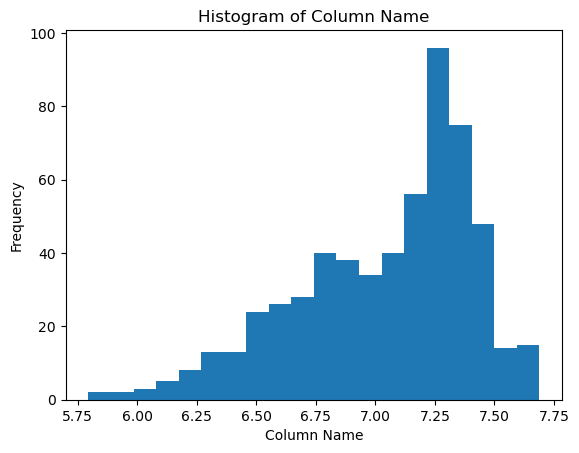

In [14]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'column_name' is the name of the column you want to plot
plt.hist(combined_df['predict'], bins=20)  # Adjust the number of bins as needed
plt.xlabel('Column Name')
plt.ylabel('Frequency')
plt.title('Histogram of Column Name')
plt.show()

In [16]:
# from sklearn.preprocessing import MinMaxScaler


# scaler = MinMaxScaler()
# combined_df['predict_scaled'] = scaler.fit_transform(combined_df[['predict']])
state_avg_df = combined_df.groupby("State").mean('predict').reset_index()
state_avg_df
# simplified_df = state_avg_df[['State', 'predict']]
state_avg_df.to_csv("../data_model/avg_predictions_by_state_v2.csv", index=False)

In [17]:
state_avg_df = pd.read_csv('../data_model/avg_predictions_by_state_v2.csv')

# Convert the DataFrame to JSON
json_data = state_avg_df.to_json(orient='records')

# Save the JSON data to a file
with open('../data_model/state_predictions_v2.json', 'w') as file:
    file.write(json_data)

In [20]:
import json


with open('../visualization/us-states.json') as f:
    states_data = json.load(f)

# Convert predictions to a DataFrame
predictions_df = pd.DataFrame(predictions)

# Extract the properties from the GeoJSON and create a DataFrame
features = states_data['features']
properties = [feature['properties'] for feature in features]
states_df = pd.DataFrame(properties)

# Merge on 'State' and 'name' to add 'predict_scaled' to the states DataFrame
merged_df = states_df.merge(state_avg_df, left_on='name', right_on='State', how='left')

merged_df['predict'] = merged_df['predict'].fillna(0)

# Update the GeoJSON with predict_scaled values
for feature in states_data['features']:
    state_name = feature['properties']['name']
    predict_scaled = merged_df.loc[merged_df['name'] == state_name, 'predict'].values
    if len(predict_scaled) > 0:
        feature['properties']['predict'] = predict_scaled[0]

# Save the updated GeoJSON to a file
with open('updated_statesData_v2.json', 'w') as f:
    json.dump(states_data, f)

In [ ]:
import json

 # Open the file and read its contents
with open('../visualization/us-states.js', 'r') as f:
    js_content = f.read()

# Remove the JavaScript variable declaration and trailing semicolon
json_str = js_content.replace("var statesData =", "").strip().rstrip(';')

# Load the cleaned JSON string
geojson_data = json.loads(json_str)

geojson_df = pd.json_normalize(geojson_data)
geojson_df.head()


,type,features
0,FeatureCollection,"[{'type': 'Feature', 'id': '01', 'properties':..."


In [ ]:
df = pd.read_csv('your_file.csv')

# Convert the DataFrame to JSON
json_data = df.to_json(orient='records')

# Save the JSON data to a file
with open('your_file.json', 'w') as file:
    file.write(json_data)